<a href="https://colab.research.google.com/github/garretbassett/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/Garret_Bassett_LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [168]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

--2019-07-19 02:43:30--  https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2019Q1.csv.zip.2’

LoanStats_2019Q1.cs     [    <=>             ]  19.30M   889KB/s    in 22s     

2019-07-19 02:43:53 (886 KB/s) - ‘LoanStats_2019Q1.csv.zip.2’ saved [20240936]



In [171]:
!unzip LoanStats_2019Q1.csv.zip

KeyboardInterrupt: ignored

In [172]:
!head LoanStats_2019Q1.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [174]:
import pandas as pd

df = pd.read_csv('LoanStats_2019Q1.csv', header=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,...,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,...,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,...,71.4,0,0,69911,37816,11400,35811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000,35000,35000,36 months,15.57%,1223.08,C,C3,Store Manager,10+ years,RENT,122000.0,Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,22.00,1,Dec-2009,0,20.0,NaN,5,0,1441,24.4%,18,w,33459.43,33459.43,2446.76,2446.76,...,100.0,0,0,65640,24471,1600,59740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000,5000,5000,36 months,15.57%,174.73,C,C3,Area Manager,3 years,OWN,65000.0,Verified,Mar-2019,Current,n,NaN,NaN,house,Home buying,640xx,MO,16.28,1,Jul-2001,0,7.0,NaN,9,0,5604,64.4%,25,w,4778.86,4778.86,340.81,340.81,...,50.0,0,0,38190,29775,4400,29490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df.isna().sum()

id                                            115675
member_id                                     115675
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      19518
emp_length                                     11101
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [176]:
df[df['loan_amnt'].isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [0]:
# df = df.drop(df[df['loan_amnt'].isna()],inplace=True)
# df.isna().sum()
#
# Why isn't this working?



## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [177]:
df.info()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Columns: 144 entries, id to settlement_term
dtypes: float64(56), int64(52), object(36)
memory usage: 127.1+ MB


,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,115675,115675,115675,115675,96157,104574,115675,115675,115675,115675,115675,115675,115675,115675,115675,115675,115546,115675,115445,110769,115673,115675,14624,16681,115675,1,1,1,1,1,1,1,115675,1,1,1
unique,2,53,7,33,39387,11,5,3,3,6,1,12,12,877,50,652,1055,2,7,3,7,2,3,577,2,1,1,1,1,1,1,1,2,1,1,1
top,36 months,8.19%,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Jan-2019,Current,n,debt_consolidation,Debt consolidation,750xx,CA,Aug-2006,0%,w,Jun-2019,Jul-2019,Jun-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,INCOME_CURTAILMENT,ACTIVE,Jun-2019,Sep-2019,Jul-2019,In Grace Period,N,May-2019,ACTIVE,May-2019
freq,78429,11314,37060,11314,2037,34490,58578,54608,43584,109176,115675,63747,63747,1162,15902,1033,1054,101423,102101,110738,111240,98994,6395,150,115674,1,1,1,1,1,1,1,115674,1,1,1


In [178]:
df.grade.value_counts()

A    37060
B    33129
C    27277
D    14797
E     3364
F       31
G       17
Name: grade, dtype: int64

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [179]:
x = '12.5%'
float(x.strip('%'))

# x.strip().astype(float) works but is Pandas-specific

12.5

In [180]:
df['int_rate'] = df['int_rate'].str.strip('%').astype(float)
df['int_rate'].head()

0    17.19
1    16.40
2    14.74
3    15.57
4    15.57
Name: int_rate, dtype: float64

Apply the function to the `int_rate` column

In [181]:
x

'12.5%'

In [182]:
def remove_pct(string):
  return float(string.strip('%'))

remove_pct(x)

12.5

In [0]:
# df['int_rate'] = df['int_rate'].apply(remove_pct)
# df['int_rate'].head()
#
# Was already done

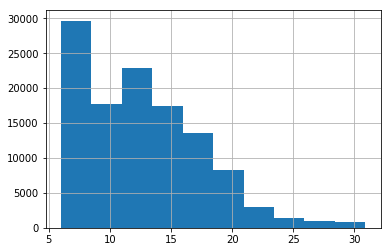

In [184]:
df['int_rate'].hist()

### Clean `emp_title`

Look at top 20 titles

In [185]:
df['emp_title'].value_counts().head(20)

Teacher                     2037
Manager                     1626
Registered Nurse             898
Driver                       857
Supervisor                   655
RN                           623
Sales                        586
Office Manager               574
Project Manager              540
General Manager              486
Owner                        449
Director                     374
Operations Manager           313
Engineer                     309
Truck Driver                 308
Sales Manager                288
Nurse                        281
Administrative Assistant     267
Supervisor                   260
Accountant                   259
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [186]:
df['emp_title'].isna().sum()

19518

In [187]:
df['emp_title'].nunique()

39387

Clean the title and handle missing values

- Capitalize
- Strip spaces
- Replace 'NaN' with missing


In [188]:
import numpy as np

def clean_emp_title(x):
  if isinstance(x, str):
    return x.strip().lower().replace(' ', '_')
  else:
    return 'MISSING'
  
example = ['owner', 'Supervisor ', ' Project manager', np.nan]
[clean_emp_title(x) for x in example]

['owner', 'supervisor', 'project_manager', 'MISSING']

In [0]:
df['emp_title'] = [clean_emp_title(x) for x in df['emp_title']]

In [190]:
df['emp_title'].nunique()

31429

In [191]:
df['emp_title'].value_counts().head()

MISSING             19518
teacher              2465
manager              2172
registered_nurse     1306
driver               1194
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [192]:
df['emp_title_manager'] = df['emp_title'].str.contains('manager')
df['emp_title_manager'].value_counts()

False    99701
True     15974
Name: emp_title_manager, dtype: int64

In [193]:
# df.groupby('emp_title_manager').int_rate.mean()
# THIS WORKS TOO

df['int_rate'].groupby(df['emp_title_manager']).mean()

emp_title_manager
False    12.744302
True     12.569483
Name: int_rate, dtype: float64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [194]:
df['issue_d'].head()

0    Mar-2019
1    Mar-2019
2    Mar-2019
3    Mar-2019
4    Mar-2019
Name: issue_d, dtype: object

In [195]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
df['issue_d'].describe()

count                  115675
unique                      3
top       2019-01-01 00:00:00
freq                    43584
first     2019-01-01 00:00:00
last      2019-03-01 00:00:00
Name: issue_d, dtype: object

In [196]:
df['issue_d'].iloc[0:5].dt.month

0    3
1    3
2    3
3    3
4    3
Name: issue_d, dtype: int64

In [197]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

df['days_since_ecl'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

df['days_since_ecl'].describe()

count    115675.000000
mean       5972.244634
std        2904.216417
min        1124.000000
25%        4141.000000
50%        5358.000000
75%        7367.000000
max       27453.000000
Name: days_since_ecl, dtype: float64

In [198]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [208]:
# Convert the term column from string to integer.

df['term'].value_counts()

df['term'] = pd.to_numeric(df['term'].str.strip('months'))

df['term'].value_counts()

# error because I already converted the 'term' column to int TEST

AttributeError: ignored

In [211]:
# Make a column named loan_status_is_great. It should contain the integer 1 if 
#   loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

df['loan_status'].value_counts()

df['loan_status_is_great'] = np.where((df['loan_status'] == 'Current') | (df['loan_status'] == 'Fully Paid'), 1, 0)

df['loan_status_is_great'].value_counts()

1    113906
0      1769
Name: loan_status_is_great, dtype: int64

In [241]:
# Make last_pymnt_d_month and last_pymnt_d_year columns.

# from datetime import datetime as dt

search_cols = [col for col in df.columns if 'last_pymnt' in col]
print(search_cols)

df['last_pymnt_d'].head()

df['last_pymnt_d_month'] = (pd.to_datetime(df['last_pymnt_d'])).dt.month
df['last_pymnt_d_month'].head()

df['last_pymnt_d_year'] = (pd.to_datetime(df['last_pymnt_d'])).dt.year
df['last_pymnt_d_year'].head()

['last_pymnt_d', 'last_pymnt_amnt', 'last_pymnt_d_month']


0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: last_pymnt_d_year, dtype: float64

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01